In [46]:
from block_diagonalization_iss import Ul,Us,UN, Unu_matrix, Unu, Upmns, CN, SN, I3, Oi, Ul_matrix
from block_diagonalization_iss import th1, th2, th3, sinth1, sinth2, sinth3
from block_diagonalization_iss import costh1, costh2, costh3
from potential_senjanovic_HiggsDoublets import epsilon
from sympy.physics.quantum import Dagger
from sympy import block_collapse, DiagonalMatrix, conjugate, sin, cos, init_printing
init_printing()

In [9]:
# Cheking unitarity of the matrix U_iss
U = block_collapse(Us*UN*conjugate(Unu_matrix)*Oi)#.subs(cos(epsilon), 1)
U

Matrix([
[   cos(epsilon)*Adjoint(U_{\nu}.T), (-I*sin(epsilon))*S_N, sin(epsilon)*C_N],
[                                 0,                 I*C_N,              S_N],
[(-sin(epsilon))*Adjoint(U_{\nu}.T), (-I*cos(epsilon))*S_N, cos(epsilon)*C_N]])

In [15]:
Uf = block_collapse((Dagger(Ul_matrix)*Us*UN*conjugate(Unu_matrix)*Oi))
Uf

Matrix([
[cos(epsilon)*Adjoint(U_{\ell})*Adjoint(U_{\nu}.T), (-I*sin(epsilon))*Adjoint(U_{\ell})*S_N, sin(epsilon)*Adjoint(U_{\ell})*C_N],
[                                                0,                                   I*C_N,                                S_N],
[               (-sin(epsilon))*Adjoint(U_{\nu}.T),                   (-I*cos(epsilon))*S_N,                   cos(epsilon)*C_N]])

In [18]:
Uiss = U.subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()#.as_explicit()
Uiss

Matrix([
[   cos(epsilon)*Adjoint(U_{\nu}.T), (-I*sin(epsilon))*DiagonalMatrix(S_N), sin(epsilon)*DiagonalMatrix(C_N)],
[                                 0,                 I*DiagonalMatrix(C_N),              DiagonalMatrix(S_N)],
[(-sin(epsilon))*Adjoint(U_{\nu}.T), (-I*cos(epsilon))*DiagonalMatrix(S_N), cos(epsilon)*DiagonalMatrix(C_N)]])

In [30]:
Ufiss = Uf.subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
Ufiss

Matrix([
[cos(epsilon)*Adjoint(U_{\ell})*Adjoint(U_{\nu}.T), (-I*sin(epsilon))*Adjoint(U_{\ell})*DiagonalMatrix(S_N), sin(epsilon)*Adjoint(U_{\ell})*DiagonalMatrix(C_N)],
[                                                0,                                   I*DiagonalMatrix(C_N),                                DiagonalMatrix(S_N)],
[               (-sin(epsilon))*Adjoint(U_{\nu}.T),                   (-I*cos(epsilon))*DiagonalMatrix(S_N),                   cos(epsilon)*DiagonalMatrix(C_N)]])

In [31]:
UDUiss = block_collapse(Dagger(Uiss) * Uiss).simplify()
UDUiss

Matrix([
[1*U_{\nu}.T*Adjoint(U_{\nu}.T),                                                                                                        0,                                                                                                        0],
[                             0,    Adjoint(DiagonalMatrix(C_N))*DiagonalMatrix(C_N) + 1*Adjoint(DiagonalMatrix(S_N))*DiagonalMatrix(S_N), -I*Adjoint(DiagonalMatrix(C_N))*DiagonalMatrix(S_N) + I*Adjoint(DiagonalMatrix(S_N))*DiagonalMatrix(C_N)],
[                             0, -I*Adjoint(DiagonalMatrix(C_N))*DiagonalMatrix(S_N) + I*Adjoint(DiagonalMatrix(S_N))*DiagonalMatrix(C_N),    1*Adjoint(DiagonalMatrix(C_N))*DiagonalMatrix(C_N) + Adjoint(DiagonalMatrix(S_N))*DiagonalMatrix(S_N)]])

In [32]:
UDUfiss = block_collapse(Dagger(Ufiss) * Ufiss).simplify()
UDUfiss

Matrix([
[                                                 sin(epsilon)**2*U_{\nu}.T*Adjoint(U_{\nu}.T) + cos(epsilon)**2*U_{\nu}.T*U_{\ell}*Adjoint(U_{\ell})*Adjoint(U_{\nu}.T),                                                                                           (-I*sin(2*epsilon)/2)*U_{\nu}.T*U_{\ell}*Adjoint(U_{\ell})*DiagonalMatrix(S_N) + (I*sin(2*epsilon)/2)*U_{\nu}.T*DiagonalMatrix(S_N),                                                                                             (-sin(2*epsilon)/2)*U_{\nu}.T*DiagonalMatrix(C_N) + (sin(2*epsilon)/2)*U_{\nu}.T*U_{\ell}*Adjoint(U_{\ell})*DiagonalMatrix(C_N)],
[(-I*sin(2*epsilon)/2)*Adjoint(DiagonalMatrix(S_N))*Adjoint(U_{\nu}.T) + (I*sin(2*epsilon)/2)*Adjoint(DiagonalMatrix(S_N))*U_{\ell}*Adjoint(U_{\ell})*Adjoint(U_{\nu}.T),             sin(epsilon)**2*Adjoint(DiagonalMatrix(S_N))*U_{\ell}*Adjoint(U_{\ell})*DiagonalMatrix(S_N) + cos(epsilon)**2*Adjoint(DiagonalMatrix(S_N))*DiagonalMatrix(S_N) + Adjoint(DiagonalMatrix(C_N))*Diag

The obtained neutrino mixing matrix is unitary

In [33]:
UDUiss.subs(Unu.T*conjugate(Unu), I3).as_explicit().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).simplify()

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [40]:
UDUfiss.subs(Unu.T*conjugate(Unu), I3).subs(Dagger(Upmns)*Upmns, I3).simplify().subs(
    Ul*Dagger(Ul), I3
).subs(
    Unu.T*conjugate(Unu), I3
).as_explicit().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).simplify()

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1]])

Block analysis

In [86]:
from block_diagonalization_iss import mNi
from sympy import DiagonalMatrix, MatrixSymbol, Identity, Matrix

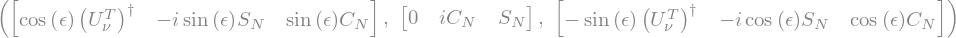

In [47]:
UL = U.blocks[0,:]
UR = U.blocks[1,:]
US = U.blocks[2,:]
UL, UR, US

In [84]:
ULDaggerUL  = (UL*Dagger(UL))[0]
URDaggerUR  = (UR*Dagger(UR))[0]
USDaggerUS  = (US*Dagger(US))[0]
display(ULDaggerUL, URDaggerUR, USDaggerUS)

In [91]:
from block_diagonalization_iss import ULmni, URmni, USmni

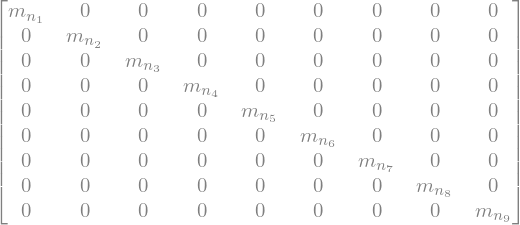

In [89]:
Mnidiag = Matrix(
    [
        [mNi[0], 0, 0, 0, 0, 0, 0, 0, 0],
        [0, mNi[1], 0, 0, 0, 0, 0, 0, 0],
        [0, 0, mNi[2], 0, 0, 0, 0, 0, 0],
        [0, 0, 0, mNi[3], 0, 0, 0, 0, 0],
        [0, 0, 0, 0, mNi[4], 0, 0, 0, 0],
        [0, 0, 0, 0, 0, mNi[5], 0, 0, 0],
        [0, 0, 0, 0, 0, 0, mNi[6], 0, 0],
        [0, 0, 0, 0, 0, 0, 0, mNi[7], 0],
        [0, 0, 0, 0, 0, 0, 0, 0, mNi[8]]
    ]
)
Mnidiag

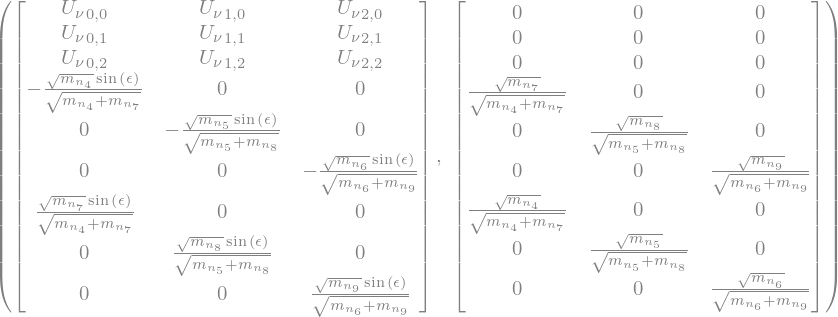

In [106]:
QLDagger = Dagger(ULmni)*(I3.as_explicit())
QRDagger = URmni.T*(I3.as_explicit())
QLDagger, QRDagger

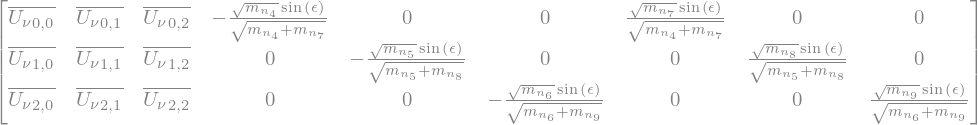

In [107]:
QL = Dagger(QLDagger)
QR = Dagger(QRDagger)
QL

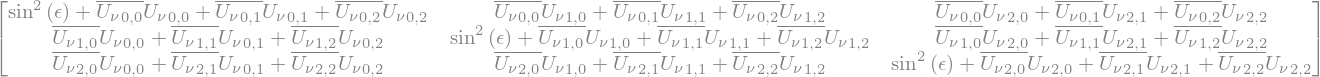

In [98]:
(QL*QLDagger).simplify()

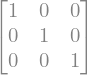

In [ ]:
(QR*QRDagger).simplify()

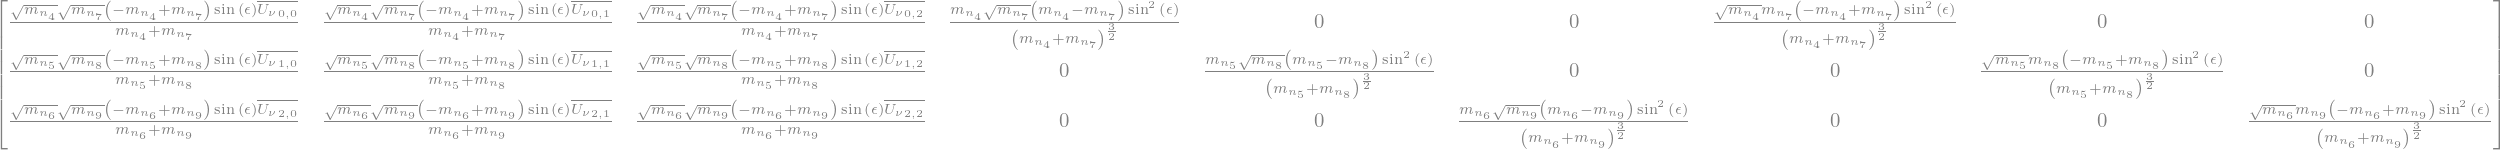

In [109]:
SRL =( QR*Mnidiag*Dagger(ULmni)*ULmni).simplify()
SRL

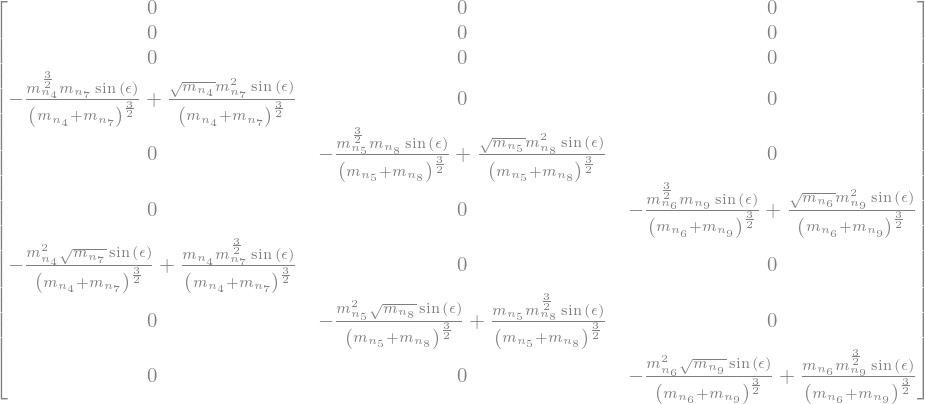

In [104]:
TRL = URmni.T*conjugate(URmni)*Mnidiag*QLDagger
TSR = (Dagger(USmni)*conjugate(USmni)*Mnidiag*Dagger(URmni)*(I3.as_explicit())).simplify()
TRL

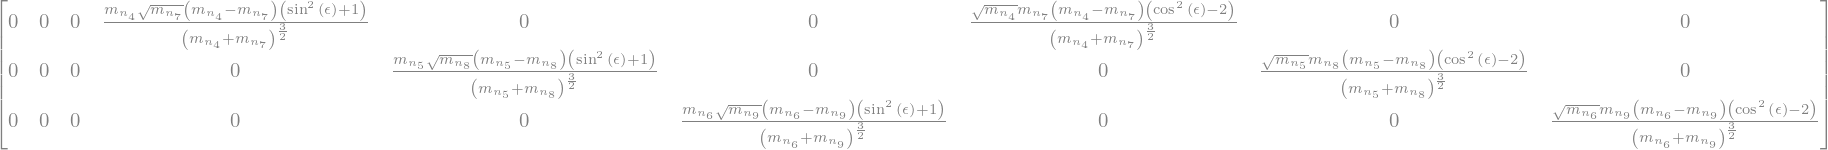

In [110]:
J = (Dagger(TSR) + SRL).simplify()
J

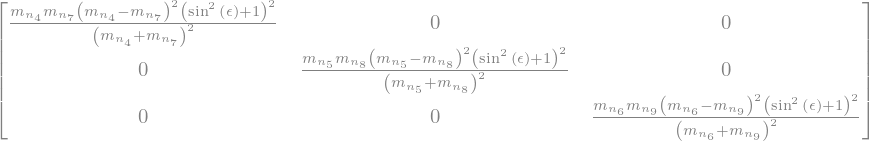

In [113]:
(J*Dagger(J)).simplify().applyfunc(lambda x:x.trigsimp())

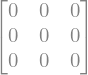

In [115]:
(J*QRDagger).simplify()

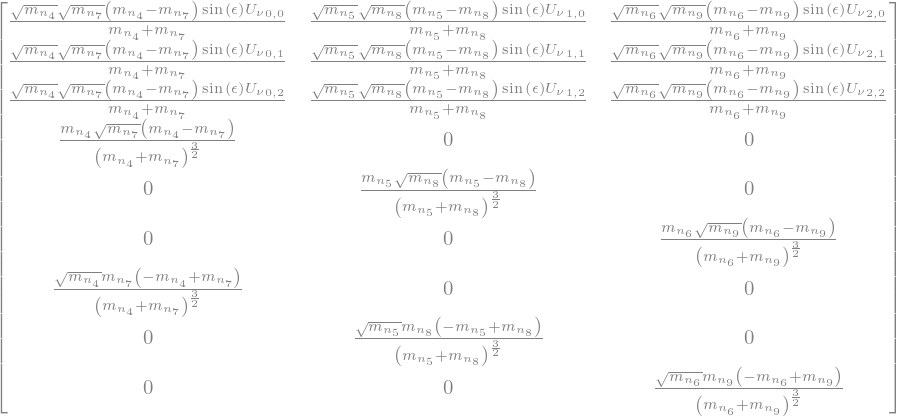

In [105]:
TSR

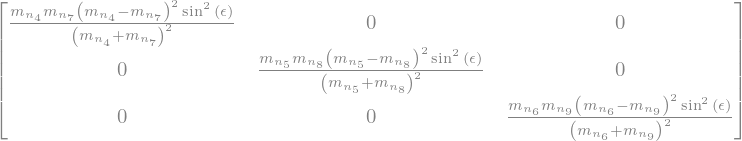

In [95]:
(Dagger(TRL)*TRL).applyfunc(lambda x: x.simplify())

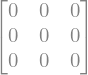

In [101]:
(QL*TRL).simplify()